# Clean WhoPaysWriters Data

A sloppy, nevertheless effective way to clean data from [WhoPaysWriters.com](http://whopayswriters.com/#/results)

[allData_raw.csv](allData_raw.csv) is created by [scrapeWPW.py](scrapeWPW.py)

A few of the decisions that I've made:
* I'm replacing most `other` entries with NaNs.
* I'm dropping everything with fewer than 100 words
* I'm dropping all `fiction` and `poetry` entries
* I'm dropping entries for 2019
* Potential spam, unreasonable outliers are cut. They are addressed on a case-by-case basis

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_csv('allData_raw.csv')
df.sample(50)

,comment,contract,dollar,flatRate,levelOfReporting,paidYet,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year
694,NaN,Contract:,$0.05,False,Little to no reporting,Haven't gotten it yet (as of this reporting),svg-3,Platform: digital,The Brooklyn Quarterly,Cold pitch (no pre-existing relationship),Rights: First Serial Rights,"opinion, editorial, column or essay",2500,2017
2544,NaN,Contract: Yes,$0.18,False,Little to no reporting,Haven't gotten it yet (as of this reporting),svg-1,Platform: digital,Into,Cold pitch (no pre-existing relationship),Rights: Other / I don't know,"opinion, editorial, column or essay",1400,2018
560,NaN,Contract: Yes,$0.03,False,Little to no reporting,NaN,ng-hide,Platform: digital,Jackson Free Press,Ongoing/pre-existing relationship with editor ...,Rights: First Serial Rights,"criticism, review, or arts/entertainment conve...",~750,2014
289,NaN,Contract: Yes,$0.33,False,Medium reporting,Paid in 1 month,svg-2,Platform: digital,Quartz,Ongoing/pre-existing relationship with editor ...,Rights: First Serial Rights,news story,750,2016
3039,"""Did not ask rate before publication (glad to ...",Contract: No,$0.20,False,Little to no reporting,NaN,ng-hide,Platform: digital,Los Angeles Times,Cold pitch (no pre-existing relationship),Rights: First Serial Rights,"opinion, editorial, column or essay",~750,2015
1506,NaN,Contract: Yes,$0.10,False,Medium reporting,Paid in 15 days,svg-1,Platform: print,Timeline,Ongoing/pre-existing relationship with editor ...,Rights: Secondary Rights/Reprint,feature,5800,2017
1802,NaN,Contract: Yes,$0.05,False,Medium reporting,Paid in 15 days,svg-1,Platform: digital,Submittable,Cold pitch (no pre-existing relationship),Rights: First Serial Rights,blog post,1000,2018
2260,NaN,Contract:,$0.07,False,NaN,Haven't gotten it yet (as of this reporting),svg-3,Platform: digital,Kveller,NaN,Rights: All rights,NaN,700-word,2018
2040,"""A good writing/editing/payment experience.""",Contract: Yes,$2.00,False,Little to no reporting,Paid in 15 days,svg-1,Platform: print,Conde Nast Traveler,Referral (you had a connection who connected y...,Rights: Other / I don't know,"opinion, editorial, column or essay",550,2017
806,"""for “non-‘magazine’ essay on their website.”""",Contract:,NaN,NaN,NaN,NaN,ng-hide,Platform: digital,The New Inquiry,NaN,Rights:,NaN,NaN,2012


### Flat rate

In [2]:
df.flatRate.unique()

array([False, nan, True], dtype=object)

### Contract

In [3]:
df.contract.unique()

array(['Contract: Yes', 'Contract: ',
       'Contract: Verbal or "handshake" agreement', 'Contract: No'],
      dtype=object)

In [4]:
# Let's stardardize these better
df['contract'].replace('Contract: ', np.nan, inplace=True)
df['contract'].replace('Contract: Yes', 'Yes', inplace=True)
df['contract'].replace('Contract: No', 'No', inplace=True)
df['contract'].replace('Contract: Verbal or "handshake" agreement', 'Verbal', inplace=True)
df.contract.unique()


array(['Yes', nan, 'Verbal', 'No'], dtype=object)

### Level of reporting

In [5]:
df.levelOfReporting.unique()

array(['Little to no reporting', nan, 'Medium reporting',
       'Ongoing/pre-existing relationship with editor or publication',
       'Heavy/Investigative reporting', 'Other',
       'Submission/spec (piece was written prior and then submitted for publication)',
       'Cold pitch (no pre-existing relationship)',
       'Assignment (editor came to you)',
       'Solicited pitch (editor asked you to pitch)'], dtype=object)

In [6]:
# mixup with relationship info
incorrect = [
    'Ongoing/pre-existing relationship with editor or publication', 
    'Cold pitch (no pre-existing relationship)', 
    'Assignment (editor came to you)', 
    'Solicited pitch (editor asked you to pitch)',
    'Other',
    'Submission/spec (piece was written prior and then submitted for publication)'
]

for i, r in df.iterrows():
    if r['levelOfReporting'] in incorrect:
        swap = r['levelOfReporting']
        df.at[i, 'levelOfReporting'] = np.nan
        df.at[i, 'relationship'] = swap

# now shorten
translate = {
    'Little to no reporting': 'Light',
    'Medium reporting': 'Medium',
    'Heavy/Investigative reporting': 'Heavy',
}


for i, r in df.iterrows():
    if r['levelOfReporting'] in translate:
        df.at[i, 'levelOfReporting'] = translate[r['levelOfReporting']]
        
df.levelOfReporting.unique()

array(['Light', nan, 'Medium', 'Heavy'], dtype=object)

### Relationship with editor

In [7]:
df.relationship.unique()

array(['Cold pitch (no pre-existing relationship)', nan,
       'Ongoing/pre-existing relationship with editor or publication',
       'Assignment (editor came to you)',
       'Referral (you had a connection who connected you to the editor)',
       'Solicited pitch (editor asked you to pitch)', 'Other',
       'Submission/spec (piece was written prior and then submitted for publication)',
       'edito', 'Calls page', 'Reprint request', 'See below'],
      dtype=object)

In [8]:
translate = {
    'Cold pitch (no pre-existing relationship)': 'Cold Pitch',
    'Ongoing/pre-existing relationship with editor or publication': 'Ongoing',
    'Assignment (editor came to you)': 'Assignment',
    'Referral (you had a connection who connected you to the editor)': 'Referral',
    'Solicited pitch (editor asked you to pitch)': 'Solicited Pitch',
    'Submission/spec (piece was written prior and then submitted for publication)': 'Spec',
    # below are items that are one-offs / too small to consider
    'Calls page': np.nan, 
    'Reprint request': np.nan,
    'Other': np.nan,
    'edito': np.nan,
    'See below': np.nan,
}

for i, r in df.iterrows():
    if r['relationship'] in translate:
        df.at[i, 'relationship'] = translate[r['relationship']]

df.relationship.unique()

array(['Cold Pitch', nan, 'Ongoing', 'Assignment', 'Referral',
       'Solicited Pitch', 'Spec'], dtype=object)

### Amount of time to be paid

In [9]:
df.paidYet.unique()

array(['Paid in 6 weeks ', 'Paid in 2 months ', 'Paid in 1 month ',
       "Haven't gotten it yet (as of this reporting) ",
       'Longer than 3 months ', 'Paid in 3 months ', nan, 'N/A ',
       'Paid in 15 days '], dtype=object)

In [10]:
translate = {
    'N/A': np.nan,
    'Paid in 15 days': 15,
    'Paid in 1 month': 30,
    'Paid in 6 weeks': 42,
    'Paid in 2 months': 60,
    'Paid in 3 months': 90,
    'Longer than 3 months': '>90',
    "Haven't gotten it yet (as of this reporting)": 'Not Yet'
}

for i, r in df.iterrows():
    if r['paidYet'] is not np.nan:
        df.at[i, 'paidYet'] = translate[r['paidYet'].strip()]

df = df.rename(index=str, columns={'paidYet': 'daysToBePaid'})
df.daysToBePaid.unique()

array([42, 60, 30, 'Not Yet', '>90', 90, nan, 15], dtype=object)

### Payment difficulty

In [11]:
df.paymentDifficulty.unique()

array(['svg-2', 'svg-4', 'svg-3', 'ng-hide', 'svg-1', 'svg-5',
       'svg-false'], dtype=object)

In [12]:
# 1 is great, 5 is bad
df.paymentDifficulty.replace('svg-1', 1, inplace=True)
df.paymentDifficulty.replace('svg-2', 2, inplace=True)
df.paymentDifficulty.replace('svg-3', 3, inplace=True)
df.paymentDifficulty.replace('svg-4', 4, inplace=True)
df.paymentDifficulty.replace('svg-5', 5, inplace=True)
df.paymentDifficulty.replace('svg-false', np.nan, inplace=True)
df.paymentDifficulty.replace('ng-hide', np.nan, inplace=True)
df.paymentDifficulty.unique()

array([ 2.,  4.,  3., nan,  1.,  5.])

### Rights

In [13]:
df.rights.unique()

array(['Rights: All rights', "Rights: Other / I don't know",
       'Rights: First Serial Rights', 'Rights: ',
       'Rights: Secondary Rights/Reprint'], dtype=object)

In [14]:
df.rights.replace('Rights: All rights', 'All', inplace=True)
df.rights.replace('Rights: First Serial Rights', 'First', inplace=True)
df.rights.replace('Rights: Secondary Rights/Reprint', 'Secondary', inplace=True)
df.rights.replace("Rights: Other / I don't know", 'Unknown/Other', inplace=True)
df.rights.replace('Rights: ', np.nan, inplace=True)
df.rights.unique()

array(['All', 'Unknown/Other', 'First', nan, 'Secondary'], dtype=object)

### Platform

In [15]:
df.platform.unique()

array(['Platform: digital', 'Platform: print', nan, 'Platform: other'],
      dtype=object)

In [16]:
df.platform.replace('Platform: digital', 'Digital', inplace=True)
df.platform.replace('Platform: print', 'Print', inplace=True)
df.platform.replace('Platform: other', np.nan, inplace=True)
df.platform.unique()

array(['Digital', 'Print', nan], dtype=object)

### Word count

In [17]:
df.wordCount.unique()

array(['500', '950-word', '800', '817', '1000', '1300', '1200',
       '500-word', '600', '400', '~750', '2500', '5000', '4000-word',
       '3500', '2500-word', '1400', '1500-word', '1500', '~1500', '1050',
       '1600', '~3000', '2000', '750', '1047', '717', '2300', '990',
       '~5000', '4500', '4973', '2200', '750-word', '1333', '1318',
       '~375', '1800', '593', '950', '3000', '700', '300', '1020', '1350',
       '400.0', nan, '3200', '2314', ' feature', '1566', '4000',
       '2000-word', '350', '2900', '700-word', '1000-word', '6000',
       '2400', '1234', '6500-word', '~4-word', '1850', '1200-word',
       '800-word', '900', '300-word', '1750', '1450.0', '250', '1125',
       '600-word', '599',
       ' criticism, review, or arts/entertainment converage', '1100',
       '1700-word', '6500', ' news story', '~125', '1250', '1400-word',
       '760-word', '1700', '1100-word', '~500', ' blog post', '732',
       '1000.0', '1300.0', '3000-word', '719', '1400.0', '200', '730',


In [18]:
# We had errors / unusual titles load into wordCount.
# find all non-numeric entries
num = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
df_test = df.replace(np.nan, 'NAN')
df_r = df_test[~df_test['wordCount'].str.contains('|'.join(num))]
df_r['wordCount'].unique()

array(['NAN', ' feature',
       ' criticism, review, or arts/entertainment converage',
       ' news story', ' blog post',
       ' opinion, editorial, column or essay', ' fob',
       ' profile or interview', ' other', ' fiction', ' poetry'],
      dtype=object)

In [19]:
# These mistakes are all storyTypes
mistakes = [' feature', ' criticism, review, or arts/entertainment converage',
       ' news story', ' blog post', ' opinion, editorial, column or essay', ' fob',
       ' profile or interview', ' other', ' fiction', ' poetry']

for i, r in df.iterrows():
    if not isinstance(r['wordCount'], float):
        if 'word' in r['wordCount']:
            df.at[i, 'wordCount'] = df.at[i, 'wordCount'].strip('word')
        if '-' in r['wordCount']:
            df.at[i, 'wordCount'] = df.at[i, 'wordCount'].strip('-')
        if '~' in r['wordCount']:
            df.at[i, 'wordCount'] = df.at[i, 'wordCount'].strip('~')
        if r['wordCount'] in mistakes:
            df.at[i, 'storyType'] = r['wordCount'].strip()
            df.at[i, 'wordCount'] = np.nan
df.wordCount = df.wordCount.astype(float)
df.wordCount.head()

0     500.0
1     950.0
2     800.0
3     817.0
4    1000.0
Name: wordCount, dtype: float64

### Story type

In [20]:
df.loc[df['storyType'] == 'criticism, review, or arts/entertainment converage', 'storyType'] = \
    'criticism, review, or arts/entertainment coverage'
df.storyType.unique()

array(['news story', nan, 'opinion, editorial, column or essay',
       'feature', 'blog post', 'other',
       'criticism, review, or arts/entertainment coverage',
       'profile or interview', 'fob', 'fiction', 'poetry'], dtype=object)

In [21]:
translate = {
    'news story': 'News',
    'opinion, editorial, column or essay': 'Opinion',
    'feature': 'Feature',
    'blog post': 'Blog',
    'other': np.nan,
    'criticism, review, or arts/entertainment coverage': 'Criticism',
    'profile or interview': 'Profile',
    'fob': 'FoB'
} # dropping fiction and poetry rows later

for i, r in df.iterrows():
    if r['storyType'] in translate:
        df.at[i, 'storyType'] = translate[r['storyType']]
df.storyType.unique()

array(['News', nan, 'Opinion', 'Feature', 'Blog', 'Criticism', 'Profile',
       'FoB', 'fiction', 'poetry'], dtype=object)

### Dollar per word (or per article if flat rate)

In [22]:
df.dollar.sample(5)

830     $0.17
1595    $0.10
3447    $0.30
1824    $0.50
1786    $0.10
Name: dollar, dtype: object

In [23]:
for i, r in df.iterrows():
    if not (r.dollar is None or isinstance(r.dollar, float)):
        df.at[i, 'dollar'] = df.at[i, 'dollar'].strip('$')
df.dollar = df.dollar.astype(float)
df.dollar.sample(5)

1328    0.02
2840    0.10
456     0.00
2527    0.15
551     0.06
Name: dollar, dtype: float64

### Insert `totalPaid` and `wordRate` column. 
Drop the vague `dollar` column

In [24]:
for i, r in df.iterrows():
    if r.flatRate:
        df.at[i, 'totalPaid'] = r['dollar']
        df.at[i, 'wordRate'] = r['dollar'] / r['wordCount']
    else:
        df.at[i, 'totalPaid'] = r['wordCount']*r['dollar']
        df.at[i, 'wordRate'] = r['dollar']

df = df.drop('dollar', axis=1)

***
# Search for outliers and potential errors

### totalPaid

count    3.368000e+03
mean     2.705572e+03
std      1.350887e+05
min      0.000000e+00
25%      7.585000e+01
50%      2.000000e+02
75%      3.960000e+02
max      7.840000e+06
Name: totalPaid, dtype: float64

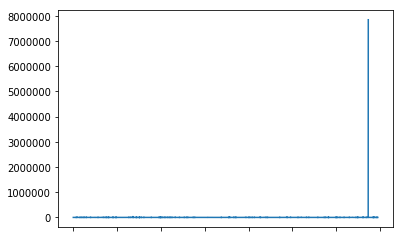

In [25]:
df['totalPaid'].plot()
df['totalPaid'].describe()

In [26]:
df[df['totalPaid'] > 100000]

,comment,contract,flatRate,levelOfReporting,daysToBePaid,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year,totalPaid,wordRate
3367,NaN,Yes,False,Heavy,60,4.0,Print,Red Bulletin,Solicited Pitch,All,Feature,2800.0,2016,7840000.0,2800.0


count     3368.000000
mean       378.612374
std        919.901719
min          0.000000
25%         75.850000
50%        200.000000
75%        396.000000
max      33600.000000
Name: totalPaid, dtype: float64

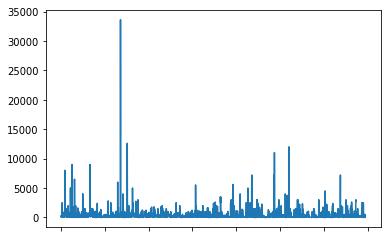

In [27]:
# I'm going to make the assumption that it was a flatRate
# I'm hard-coding this in. Could mistake future outliers!
df.loc[df['totalPaid'] > 100000, 'flatRate'] = True
df.loc[df['totalPaid'] > 100000, 'wordRate'] = 1
df.loc[df['totalPaid'] > 100000, 'totalPaid'] = 2800
df['totalPaid'].plot()
df['totalPaid'].describe()

### wordRate

count    3192.000000
mean        0.380072
std         4.443633
min         0.000000
25%         0.070000
50%         0.190000
75%         0.350000
max       250.000000
Name: wordRate, dtype: float64

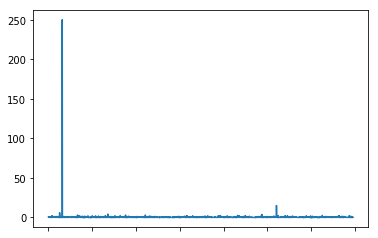

In [28]:
df['wordRate'].plot()
df['wordRate'].describe()
# Wow. That's a lot of money.

In [29]:
df[(df['wordRate'] > 20)]

,comment,contract,flatRate,levelOfReporting,daysToBePaid,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year,totalPaid,wordRate
158,NaN,NaN,False,NaN,NaN,NaN,NaN,Global Post,NaN,NaN,NaN,4.0,2013,1000.0,250.0


count    3191.000000
mean        0.301846
std         0.461516
min         0.000000
25%         0.070000
50%         0.190000
75%         0.350000
max        15.000000
Name: wordRate, dtype: float64

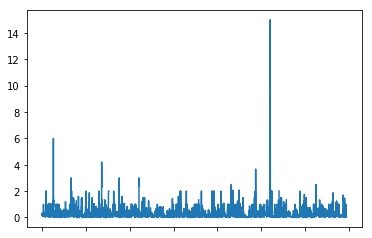

In [30]:
# That's probably not right. Let's assume that is spam.
df = df[(df['wordRate'] <= 20) | (df['wordRate'].isnull())]

df['wordRate'].plot()
df['wordRate'].describe()

In [31]:
# Just check that last jump
df[df['wordRate'] > 5]
# Yeah that looks alright

,comment,contract,flatRate,levelOfReporting,daysToBePaid,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year,totalPaid,wordRate
128,NaN,NaN,False,NaN,42,1.0,Print,Science Magazine,NaN,Unknown/Other,NaN,1500.0,2017,9000.0,6.0
2603,NaN,Yes,False,Medium,15,1.0,Digital,Curve Magazine,Ongoing,First,Profile,800.0,2017,12000.0,15.0


### wordCount

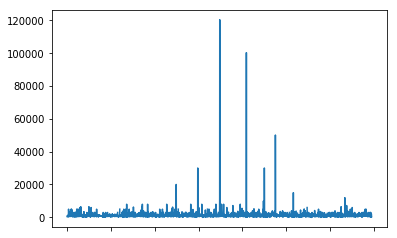

In [32]:
df['wordCount'].plot()
# Hm that's a lot of words.

In [33]:
df[df['wordCount'] > 15000]

,comment,contract,flatRate,levelOfReporting,daysToBePaid,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year,totalPaid,wordRate
1245,NaN,NaN,False,NaN,NaN,2.0,Digital,Atlanta Blackstar,NaN,Unknown/Other,NaN,20000.0,2018,400.0,0.02
1491,"""Pays two months after publication.""",Yes,False,Heavy,NaN,NaN,Print,The Believer,Solicited Pitch,All,Profile,30000.0,2013,300.0,0.01
1742,NaN,Yes,False,Light,Not Yet,5.0,Digital,Kpopstarz,Ongoing,All,NaN,120000.0,2017,2400.0,0.02
2046,"""The commission was for a guidebook published ...",Yes,False,Light,Not Yet,5.0,Print,Highend Media / Gatehouse Publishing,NaN,All,NaN,100000.0,2018,4000.0,0.04
2251,NaN,Yes,False,Light,NaN,NaN,Digital,The American Reader,Cold Pitch,First,fiction,30000.0,2014,900.0,0.03
2377,"""Books tend to have ongoing royalties: 6% afte...",Yes,False,Heavy,NaN,NaN,Print,Oxford University Press,Cold Pitch,All,NaN,50000.0,2013,1000.0,0.02


In [34]:
# Yikes. This isn't straightforward
for i in df[df['wordCount'] > 15000]['comment']:
    print(i, end='\n\n')
df.shape[0]

nan

"Pays two months after publication."

nan

"The commission was for a guidebook published by Gatehouse, which was bought by HighEnd Media in December 2017. HighEnd's MD is non-responsive to emails, except to say there is current a "funding freeze" and he has been "instructed not to expect any additional funds until March." HighEnd's other publications include Billionaire Magazine and Crown Magazine."

nan

"Books tend to have ongoing royalties: 6% after the first 600 paperback copies (0% for the first 600). The initial print run was: 600 copies. (Luckily mine sold out and they did a second printing.) The book was based on my dissertation. I now have a student with a dissertation-based book ms accepted at Oxford University Press who was told they no longer pay *any* royalties for "books based on dissertations". 

Academics also typically get paid zero for chapters they write in edited volumes, for encyclopedia entries, and other smaller pieces (at least in the humanities). I'd love 

3474

In [35]:
# Let's decide to drop books.
# The American Reader and The Believer have lengthy reports. Let's believe those.
# I can find few Atlanta Black Star and Kpopstarz stories anywhere near these estimates. 
#     I'm dropping these submissions

keepIf = (df['wordCount'] < 15000) | df['wordCount'].isnull() | df['publication'].isin(['The American Reader', 'The Believer'])
df = df[keepIf]
df[df['wordCount'] > 15000]
df.shape[0]

3469

In [36]:
# drop all submissions with especially low word-counts
df = df[(df['wordCount'] >= 100) | df['wordCount'].isnull()]

### Remove 2019, poetry and fiction

In [37]:
df = df[df['year'] != 2019]
df = df[~df['storyType'].isin(['poetry', 'fiction'])]

***
# Check quality, reorder columns, and export

In [38]:
df.sample(50)

,comment,contract,flatRate,levelOfReporting,daysToBePaid,paymentDifficulty,platform,publication,relationship,rights,storyType,wordCount,year,totalPaid,wordRate
3276,"""Wow, this publication seriously sucks. I foll...",No,False,Medium,NaN,NaN,Digital,International Policy Digest,Cold Pitch,Unknown/Other,Criticism,1600.0,2017,0.00,0.00
827,NaN,No,False,Medium,30,1.0,Digital,Alma,Solicited Pitch,First,Opinion,750.0,2018,97.50,0.13
2517,NaN,Yes,False,Medium,90,3.0,Digital,American Theatre,Solicited Pitch,First,Criticism,1000.0,2016,150.00,0.15
2308,NaN,No,False,Light,15,1.0,Digital,Bitch,Assignment,Unknown/Other,Criticism,1139.0,2016,45.56,0.04
2593,NaN,NaN,True,NaN,NaN,NaN,NaN,Grist,NaN,NaN,NaN,NaN,2013,275.00,NaN
465,"""Signed contract for $50 on publication, sent ...",Yes,False,Light,NaN,NaN,Digital,Xojane,Cold Pitch,All,Opinion,750.0,2016,0.00,0.00
663,NaN,Yes,False,Medium,30,2.0,Print,Yourtango,Ongoing,First,Feature,600.0,2017,36.00,0.06
2903,NaN,NaN,False,Medium,NaN,NaN,Digital,The Hairpin,Cold Pitch,Unknown/Other,Profile,1000.0,2017,0.00,0.00
2098,"""My direct editor was great to work with, but ...",Yes,False,Light,Not Yet,4.0,Digital,Paste Magazine,NaN,Unknown/Other,NaN,500.0,2017,20.00,0.04
239,NaN,No,False,Light,Not Yet,3.0,Digital,Vice,Cold Pitch,All,Feature,1200.0,2017,252.00,0.21


In [39]:
cols = ['publication', 'year', # meta
    'wordRate', 'wordCount', 'flatRate', 'totalPaid', # payment
    'paymentDifficulty', 'daysToBePaid', # payment red tape 
    'storyType', 'levelOfReporting', # effort
    'relationship', 'rights', 'platform', 'contract', # business
    'comment'] #other
df = df[cols]
df.sample(60)

,publication,year,wordRate,wordCount,flatRate,totalPaid,paymentDifficulty,daysToBePaid,storyType,levelOfReporting,relationship,rights,platform,contract,comment
1800,Submittable,2018,0.04,1150.0,False,46.00,1.0,30,NaN,NaN,NaN,First,Digital,NaN,NaN
711,Rolling Stone,2016,0.16,1600.0,False,256.00,4.0,60,Opinion,Medium,Ongoing,Unknown/Other,Digital,Verbal,"""For some reason they can't do direct deposit."""
3332,Waterworld,2017,0.42,1200.0,False,504.00,1.0,30,Feature,Medium,Assignment,First,Digital,No,NaN
3248,The Iowa Review,2012,NaN,NaN,True,200.00,NaN,NaN,Profile,NaN,NaN,NaN,NaN,NaN,NaN
428,Extra Crispy,2017,0.50,500.0,False,250.00,4.0,>90,Blog,Light,Cold Pitch,Unknown/Other,Digital,No,NaN
396,Mit Technology Review,2016,0.79,634.0,False,500.86,3.0,30,News,Medium,Ongoing,Unknown/Other,Digital,Verbal,NaN
1493,The Believer,2013,NaN,NaN,True,300.00,NaN,NaN,Profile,NaN,NaN,NaN,NaN,NaN,NaN
1445,Muslim Girl,2016,0.00,1500.0,False,0.00,NaN,NaN,Opinion,NaN,Ongoing,First,Digital,No,NaN
1945,Mask Magazine,2017,0.05,1000.0,False,50.00,2.0,30,Profile,Medium,Cold Pitch,First,Digital,Yes,NaN
2864,The Billfold,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.to_csv('allData_clean.csv', index=False)